In [1]:
import subprocess
import sys
import os
import json

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install('kaggle')
install("pandas")
install("numpy")
install("matplotlib")
install("seaborn")


 Criando o arquivo `kaggle.json` para autenticação na plataforma da Kaggle

In [2]:
install("python-dotenv")

from dotenv import load_dotenv

load_dotenv()

kaggle_config = {
    "username": os.getenv('USER'),
    "key": os.getenv('KEY')
}

os.makedirs(os.path.join(os.path.expanduser("~"), ".kaggle"), exist_ok=True)

with open(os.path.join(os.path.expanduser("~"), ".kaggle/kaggle.json"), "w") as file:
    json.dump(kaggle_config, file)

os.chmod(os.path.join(os.path.expanduser("~"), ".kaggle/kaggle.json"), 0o600)

Baixando o dataset `brazilian-ecommerce`

In [3]:
def download_kaggle_dataset(dataset):
    subprocess.run(["kaggle", "datasets", "download", "-d", dataset])

download_kaggle_dataset("olistbr/brazilian-ecommerce")

Extraindo o dataset

In [56]:
import zipfile

with zipfile.ZipFile("brazilian-ecommerce.zip", "r") as zip_ref:
    zip_ref.extractall("brazilian_ecommerce")


FileNotFoundError: [Errno 2] No such file or directory: 'brazilian-ecommerce.zip'

Acessando o dataset através da biblioteca `pandas`

In [57]:
import pandas as pd
# Criação de uma lista para identificar valores ausentes
lista_labels_valores_ausentes = ["n/a", "na", "undefined"]

# Carregamento dos datasets
customers = pd.read_csv("../data/brazilian_ecommerce/olist_customers_dataset.csv", na_values = lista_labels_valores_ausentes)
geolocation = pd.read_csv("../data/brazilian_ecommerce/olist_geolocation_dataset.csv", na_values = lista_labels_valores_ausentes)
order_items = pd.read_csv("../data/brazilian_ecommerce/olist_order_items_dataset.csv", na_values = lista_labels_valores_ausentes)
payments = pd.read_csv("../data/brazilian_ecommerce/olist_order_payments_dataset.csv", na_values = lista_labels_valores_ausentes)
reviews = pd.read_csv("../data/brazilian_ecommerce/olist_order_reviews_dataset.csv", na_values = lista_labels_valores_ausentes)
orders = pd.read_csv("../data/brazilian_ecommerce/olist_orders_dataset.csv", na_values = lista_labels_valores_ausentes)
products = pd.read_csv("../data/brazilian_ecommerce/olist_products_dataset.csv", na_values = lista_labels_valores_ausentes)
sellers = pd.read_csv("../data/brazilian_ecommerce/olist_sellers_dataset.csv", na_values = lista_labels_valores_ausentes)
category = pd.read_csv("../data/brazilian_ecommerce/product_category_name_translation.csv", na_values = lista_labels_valores_ausentes)


Mostrando o total de registros por dataset

In [59]:
import numpy as np

# Total de registros por dataset
count_array = np.array([
    ["customers", len(customers)],
    ["geolocation", len(geolocation)],
    ['geolocation', len(geolocation)],
    ['order_items', len(order_items)],
    ['payments', len(payments)],
    ['reviews', len(reviews)],
    ['orders', len(orders)],
    ['products', len(products)],
    ['sellers', len(sellers)],
    ['category', len(category)]
])

count_record = pd.DataFrame(count_array, columns = ["Tabela", "Total de Registros"])
print(count_record)

        Tabela Total de Registros
0    customers              99441
1  geolocation            1000163
2  geolocation            1000163
3  order_items             112650
4     payments             103886
5      reviews              99224
6       orders              99441
7     products              32951
8      sellers               3095
9     category                 71


Criando uma função para fazer um resumo da tabela informada

In [60]:
# Função para resumir a tabela informada
def resumo_tabela(tabela):
    print(f"Quantidade de colunas: {tabela.shape[1]}\nQuantidade de registros: {tabela.shape[0]}\n")

    porcentagem_nulls = (tabela.isnull().sum() / tabela.shape[0]) * 100

    print("Porcentagem de valores ausentes por coluna:")
    print(round(porcentagem_nulls.sort_values(ascending=False), 2))
    

    print(tabela.head(2))


Mostrando o resumo as Tabelas

In [61]:
resumo_tabela(customers)

Quantidade de colunas: 5
Quantidade de registros: 99441

Porcentagem de valores ausentes por coluna:
customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  


In [62]:
resumo_tabela(geolocation)

Quantidade de colunas: 5
Quantidade de registros: 1000163

Porcentagem de valores ausentes por coluna:
geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  


In [63]:
resumo_tabela(order_items)

Quantidade de colunas: 7
Quantidade de registros: 112650

Porcentagem de valores ausentes por coluna:
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   

   shipping_limit_date  price  freight_value  
0  2017-09-19 09:45:35   58.9          13.29  
1  2017-05-03 11:05:13  239.9          19.93  


In [64]:
resumo_tabela(payments)

Quantidade de colunas: 5
Quantidade de registros: 103886

Porcentagem de valores ausentes por coluna:
order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64
                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  


In [65]:
resumo_tabela(reviews)

Quantidade de colunas: 7
Quantidade de registros: 99224

Porcentagem de valores ausentes por coluna:
review_comment_title       88.34
review_comment_message     58.70
review_id                   0.00
order_id                    0.00
review_score                0.00
review_creation_date        0.00
review_answer_timestamp     0.00
dtype: float64
                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   

   review_score review_comment_title review_comment_message  \
0             4                  NaN                    NaN   
1             5                  NaN                    NaN   

  review_creation_date review_answer_timestamp  
0  2018-01-18 00:00:00     2018-01-18 21:46:59  
1  2018-03-10 00:00:00     2018-03-11 03:05:13  


A tabela `reviews` possui 2 colunas com dados nulos:

    1. a coluna "review_coment_title" está com 88% de dados faltantes 
    2. a coluna "review_coment_message" está com 59% de dados faltantes

dadas asa alta proporção de dados faltantes para essas colunas faremos a remoção dessas colunas em nossas análises.

In [66]:
# Removendo as 2 colunas com alto percentual de valores ausentes
reviews = reviews.drop(['review_comment_title', 'review_comment_message'], axis= 1)

resumo_tabela(reviews)

Quantidade de colunas: 5
Quantidade de registros: 99224

Porcentagem de valores ausentes por coluna:
review_id                  0.0
order_id                   0.0
review_score               0.0
review_creation_date       0.0
review_answer_timestamp    0.0
dtype: float64
                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   

   review_score review_creation_date review_answer_timestamp  
0             4  2018-01-18 00:00:00     2018-01-18 21:46:59  
1             5  2018-03-10 00:00:00     2018-03-11 03:05:13  


In [67]:
resumo_tabela(orders)

Quantidade de colunas: 8
Quantidade de registros: 99441

Porcentagem de valores ausentes por coluna:
order_delivered_customer_date    2.98
order_delivered_carrier_date     1.79
order_approved_at                0.16
order_id                         0.00
customer_id                      0.00
order_status                     0.00
order_purchase_timestamp         0.00
order_estimated_delivery_date    0.00
dtype: float64
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00         

A tabela `Orders` possui 3 colunas com valores ausentes:

    1. "Order_delivered_customer_date" com 3% de valores ausentes
    2. "Order_delivered_carrier_date" com 2% de valores ausentes
    3. "Order_approved_at" com menos de 1% dos dados ausentes

dada a proporção dos dados ausentes, considero a exclusão dessas linhas para seguirmos com as análises efetivas.

In [68]:
# Drop das linhas com valores ausentes
orders = orders.dropna()

resumo_tabela(orders)

Quantidade de colunas: 8
Quantidade de registros: 96461

Porcentagem de valores ausentes por coluna:
order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
dtype: float64
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-0

In [69]:
resumo_tabela(products)

Quantidade de colunas: 9
Quantidade de registros: 32951

Porcentagem de valores ausentes por coluna:
product_category_name         1.85
product_name_lenght           1.85
product_description_lenght    1.85
product_photos_qty            1.85
product_weight_g              0.01
product_length_cm             0.01
product_height_cm             0.01
product_width_cm              0.01
product_id                    0.00
dtype: float64
                         product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                 artes   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1     

Na planilha `products` existem valores ausentes em todas as colunas que representam menos de 2% do percentual total.
Considerando o volume de ausência faremos a exclusão dessas linhas

In [70]:
# Excluindo as linhas com valores ausentes
products = products.dropna()

resumo_tabela(products)

Quantidade de colunas: 9
Quantidade de registros: 32340

Porcentagem de valores ausentes por coluna:
product_id                    0.0
product_category_name         0.0
product_name_lenght           0.0
product_description_lenght    0.0
product_photos_qty            0.0
product_weight_g              0.0
product_length_cm             0.0
product_height_cm             0.0
product_width_cm              0.0
dtype: float64
                         product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                 artes   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            10

In [71]:
resumo_tabela(sellers)

Quantidade de colunas: 4
Quantidade de registros: 3095

Porcentagem de valores ausentes por coluna:
seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64
                          seller_id  seller_zip_code_prefix seller_city  \
0  3442f8959a84dea7ee197c632cb2df15                   13023    campinas   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844  mogi guacu   

  seller_state  
0           SP  
1           SP  


In [72]:
resumo_tabela(category)

Quantidade de colunas: 2
Quantidade de registros: 71

Porcentagem de valores ausentes por coluna:
product_category_name            0.0
product_category_name_english    0.0
dtype: float64
    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories


Contagem de valores únicos por categoria

In [73]:
products["product_category_name"].value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

In [74]:
# Reagrupamento das categorias
moda_acessorios = ['fashion_bolsas_e_acessorios', 'fashion_calcados', 'fashion_roupa_masculina',
                   'fashion_roupa_feminina', 'fashion_underwear_e_moda_praia', 'fashion_esporte', 'relogios_presentes','malas_acessorios', 'fashion_roupa_infanto_juvenil']

casa_decoracao = ['cama_mesa_banho', 'moveis_decoracao', 'moveis_escritorio', 'moveis_sala', 'moveis_quarto',
                  'moveis_cozinha_area_de_servico_jantar_e_jardim', 'moveis_colchao_e_estofado', 
                  'casa_conforto', 'casa_conforto_2', 'la_cuisine', 'utilidades_domesticas','eletroportateis', 'portateis_casa_forno_e_cafe','cool_stuff', 'eletrodomesticos', 'eletrodomesticos_2','artes_e_artesanato','ferramentas_jardim', 'climatizacao', 'moveis_colchao_e_estofado', 'portateis_cozinha_e_preparadores_de_alimentos','flores','artigos_de_natal', 'artigos_de_festas']

casa_construcao = ['construcao_ferramentas_construcao', 'casa_construcao', 'construcao_ferramentas_seguranca', 
                   'construcao_ferramentas_jardim', 'construcao_ferramentas_iluminacao', 'construcao_ferramentas_ferramentas','sinalizacao_e_seguranca']

eletronicos_tecnologia = ['informatica_acessorios', 'eletronicos', 'tablets_impressao_imagem', 'pcs','consoles_games', 'audio', 
                          'telefonia', 'telefonia_fixa', 'pc_gamer']

infantil = ['bebes']

automotivo = ['automotivo']

hobbies_entretenimento = ['esporte_lazer', 'brinquedos', 'instrumentos_musicais', 'cds_dvds_musicais', 'dvds_blu_ray',
                          'musica', 'cine_foto', 'artes', 'brinquedos', 'audio']

pet_shop = ['pet_shop']

livros_papelaria = ['livros_interesse_geral', 'livros_tecnicos ', 'livros_importados', 'papelaria']

saude_higiene = ['beleza_saude','perfumaria', 'fraldas_higiene']

alimentos_bebidas = ['alimentos_bebidas', 'alimentos', 'bebidas']

agro_ind_comercio = ['agro_industria_e_comercio','industria_comercio_e_negocios']

outros = ['seguros_e_servicos', 'market_place']

# Criando uma nova coluna 'categoria_agrupada' com valor padrão 'Outros'
products['categoria_agrupada'] = 'Outros'

# Aplicando os agrupamentos
products.loc[products['product_category_name'].isin(moda_acessorios), 'categoria_agrupada'] = 'Moda e Acessórios'
products.loc[products['product_category_name'].isin(casa_decoracao), 'categoria_agrupada'] = 'Casa e Decoração'
products.loc[products['product_category_name'].isin(casa_construcao), 'categoria_agrupada'] = 'Casa e Construção'
products.loc[products['product_category_name'].isin(eletronicos_tecnologia), 'categoria_agrupada'] = 'Eletrônicos e Tecnologia'
products.loc[products['product_category_name'].isin(hobbies_entretenimento), 'categoria_agrupada'] = 'Hobbies e Entretenimento'
products.loc[products['product_category_name'].isin(saude_higiene), 'categoria_agrupada'] = 'Saúde e Higiene'
products.loc[products['product_category_name'].isin(infantil), 'categoria_agrupada'] = 'Infantil'
products.loc[products['product_category_name'].isin(automotivo), 'categoria_agrupada'] = 'Automotivo'
products.loc[products['product_category_name'].isin(pet_shop), 'categoria_agrupada'] = 'Pet-Shop'
products.loc[products['product_category_name'].isin(livros_papelaria), 'categoria_agrupada'] = 'Livros e Papelaria'
products.loc[products['product_category_name'].isin(alimentos_bebidas), 'categoria_agrupada'] = 'Alimentos e Bebidas'
products.loc[products['product_category_name'].isin(agro_ind_comercio), 'categoria_agrupada'] = 'Agro, Ind. e Comércio'
products.loc[products['product_category_name'].isin(outros), 'categoria_agrupada'] = 'Outros'



In [75]:
resumo_tabela(products)

Quantidade de colunas: 10
Quantidade de registros: 32340

Porcentagem de valores ausentes por coluna:
product_id                    0.0
product_category_name         0.0
product_name_lenght           0.0
product_description_lenght    0.0
product_photos_qty            0.0
product_weight_g              0.0
product_length_cm             0.0
product_height_cm             0.0
product_width_cm              0.0
categoria_agrupada            0.0
dtype: float64
                         product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                 artes   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0             225.0               16.0               10.0

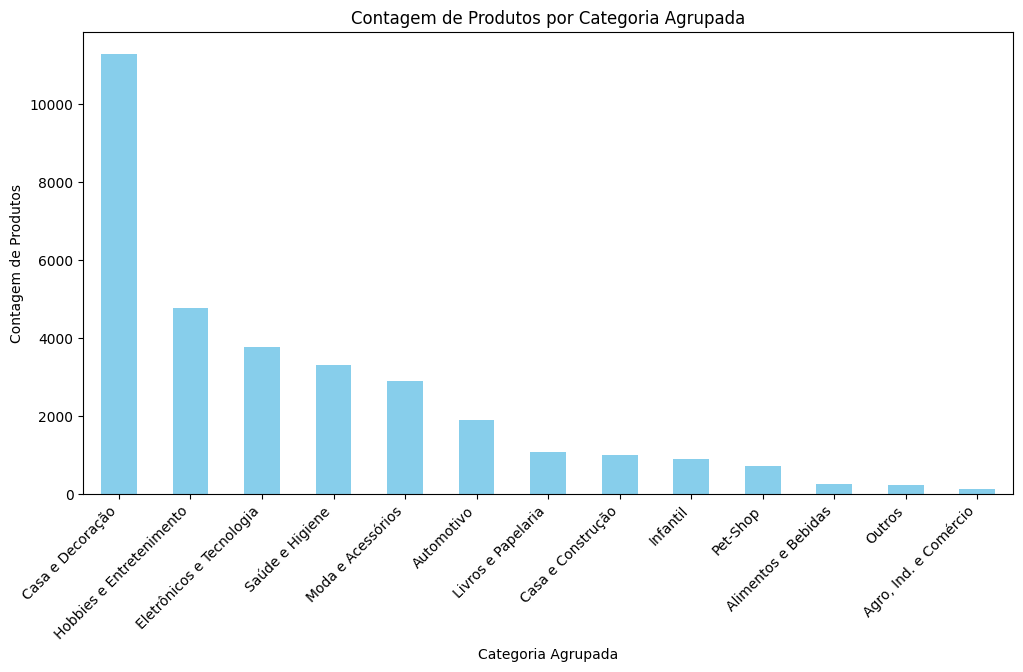

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criando um gráfico de barras
plt.figure(figsize=(12, 6))  # Ajuste o tamanho conforme necessário

# Contar a frequência de cada categoria agrupada
contagem_categorias = products['categoria_agrupada'].value_counts()

# Plotar o gráfico de barras
contagem_categorias.plot(kind='bar', color='skyblue')
plt.title('Contagem de Produtos por Categoria Agrupada')
plt.xlabel('Categoria Agrupada')
plt.ylabel('Contagem de Produtos')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos no eixo x para melhor legibilidade
plt.show()

Unindo todas as tabelas

In [77]:
# Unindo as tabelas
merged_data = pd.merge(orders, customers, on='customer_id')
merged_data = pd.merge(merged_data, order_items, on='order_id')
merged_data = pd.merge(merged_data, products, on='product_id')
merged_data = pd.merge(merged_data, reviews, on='order_id')
merged_data = pd.merge(merged_data, payments, on='order_id')

In [78]:
resumo_tabela(merged_data)

Quantidade de colunas: 35
Quantidade de registros: 113216

Porcentagem de valores ausentes por coluna:
order_id                         0.0
categoria_agrupada               0.0
product_description_lenght       0.0
product_photos_qty               0.0
product_weight_g                 0.0
product_length_cm                0.0
product_height_cm                0.0
product_width_cm                 0.0
review_id                        0.0
product_category_name            0.0
review_score                     0.0
review_creation_date             0.0
review_answer_timestamp          0.0
payment_sequential               0.0
payment_type                     0.0
payment_installments             0.0
product_name_lenght              0.0
freight_value                    0.0
customer_id                      0.0
customer_unique_id               0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_del

In [80]:
produtoMaisCaro = merged_data.loc[merged_data["price"].idxmax()]

produtoMaisCaro[['product_id', 'categoria_agrupada', 'price']]

product_id            489ae2aa008f021502940f251d4cce7f
categoria_agrupada                    Casa e Decoração
price                                           6735.0
Name: 79965, dtype: object

In [81]:
produtoMaisBarato = merged_data.loc[merged_data["price"].idxmin()]

produtoMaisBarato[["product_id", "categoria_agrupada", "price"]]

product_id            8a3254bee785a526d548a81a9bc3c9be
categoria_agrupada                   Casa e Construção
price                                             0.85
Name: 79759, dtype: object

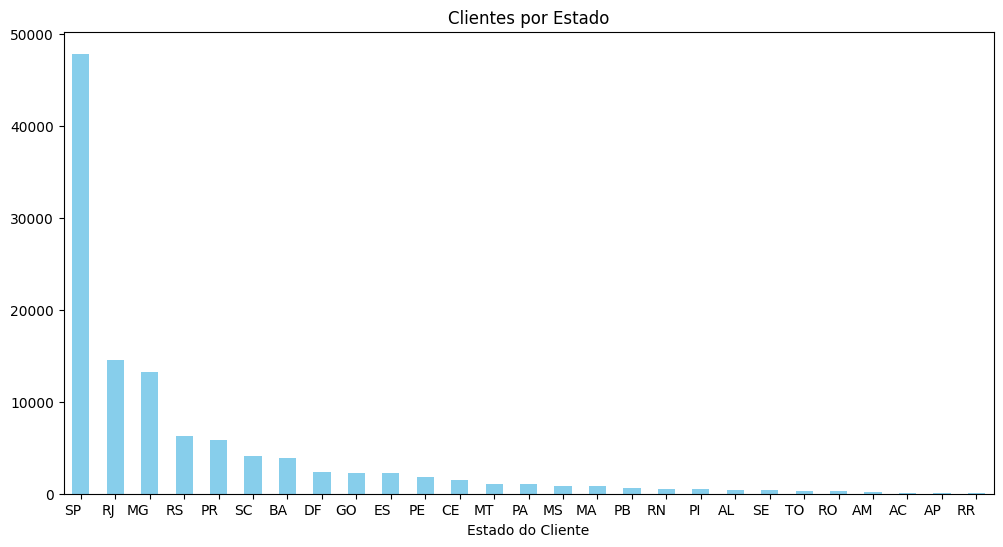

In [82]:
# Agrupamento dos clientes por estado 
clientes_por_estado = merged_data['customer_state'].value_counts()

plt.figure(figsize=(12, 6))

clientes_por_estado.plot(kind="bar", color="skyblue")
plt.title("Clientes por Estado")
plt.xlabel("Estado do Cliente")
plt.xticks(rotation=0, ha='right')
plt.show()

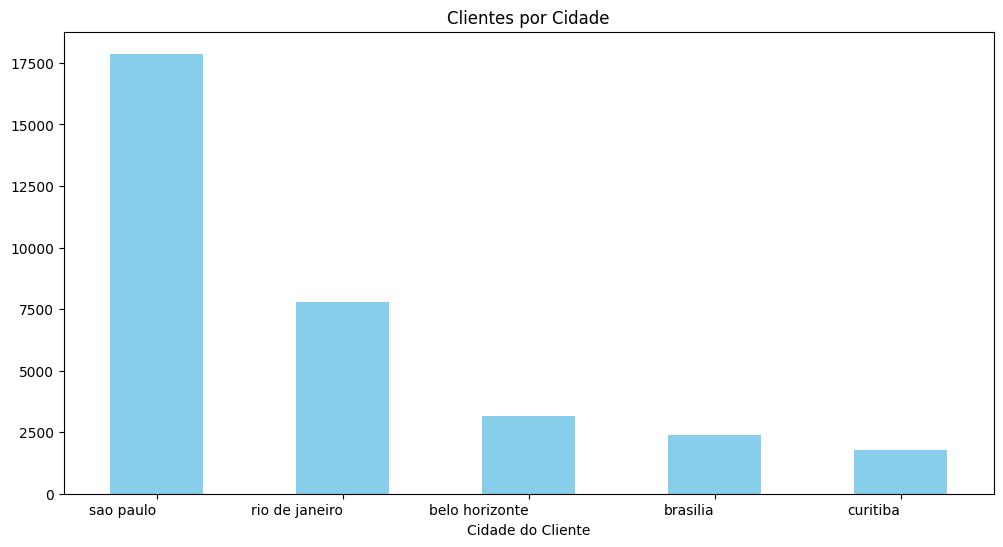

In [146]:
clientes_por_cidade = merged_data["customer_city"].value_counts()

plt.figure(figsize=(12, 6))
clientes_por_cidade.head().plot(kind="bar", color="skyblue")
plt.title("Clientes por Cidade")
plt.xlabel("Cidade do Cliente")
plt.xticks(rotation=0, ha="right")
plt.show()

In [160]:
def mostrar_total_pagamentos_por_categoria(sigla_estado: str):
    """
    Calcula o total de pagamentos por categoria para compras realizadas em um estado específico e mostra
    em um gráfico

    Parâmetros:
    - sigla_estado: Sigla do estado para o qual calcular o total de pagamentos.

    Retorna:
    - None.
    """

    total_pagamentos_por_categoria = merged_data[merged_data["customer_state"] == sigla_estado].groupby("categoria_agrupada")["payment_value"].sum().sort_values(ascending=False)

    plt.figure(figsize=(12, 6))

    sns.barplot(x=total_pagamentos_por_categoria.index, y=total_pagamentos_por_categoria.values, palette='viridis')
    plt.title(f'Total de Pagamentos Por Categoria no Estado de {sigla_estado}')
    plt.xlabel('Categoria Agrupada')
    plt.ylabel('Total de Vendas')
    plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos no eixo x para melhor legibilidade
    plt.show()
    

C:\Users\Pichau\AppData\Local\Temp\ipykernel_7496\3685359666.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_pagamentos_por_categoria.index, y=total_pagamentos_por_categoria.values, palette='viridis')


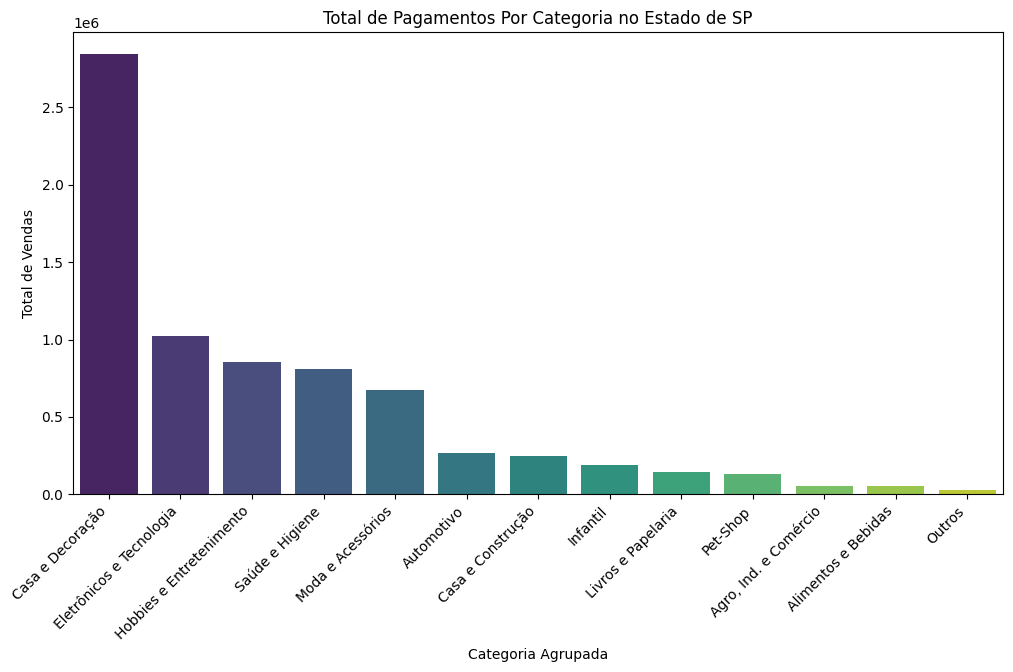

In [175]:
total_pagamentos_por_categoria_sao_paulo = mostrar_total_pagamentos_por_categoria("SP")
total_pagamentos_por_categoria_sao_paulo

In [176]:
def total_pagamentos_por_categoria_no_ano(ano: int):
    """
    Calcula o total de pagamentos por categoria para compras realizadas em um ano específico.

    Parâmetros:
    - ano: Ano para o qual calcular o total de pagamentos.

    Retorna:
    - Série contendo o total de pagamentos por categoria, ordenada em ordem decrescente.
    """

    merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

    return merged_data[merged_data["order_purchase_timestamp"].dt.year == ano].groupby("categoria_agrupada")["payment_value"].sum().sort_values(ascending=False)



C:\Users\Pichau\AppData\Local\Temp\ipykernel_7496\658758369.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_pagamentos_ano_2018.index, y=total_pagamentos_ano_2018.values, palette='viridis')


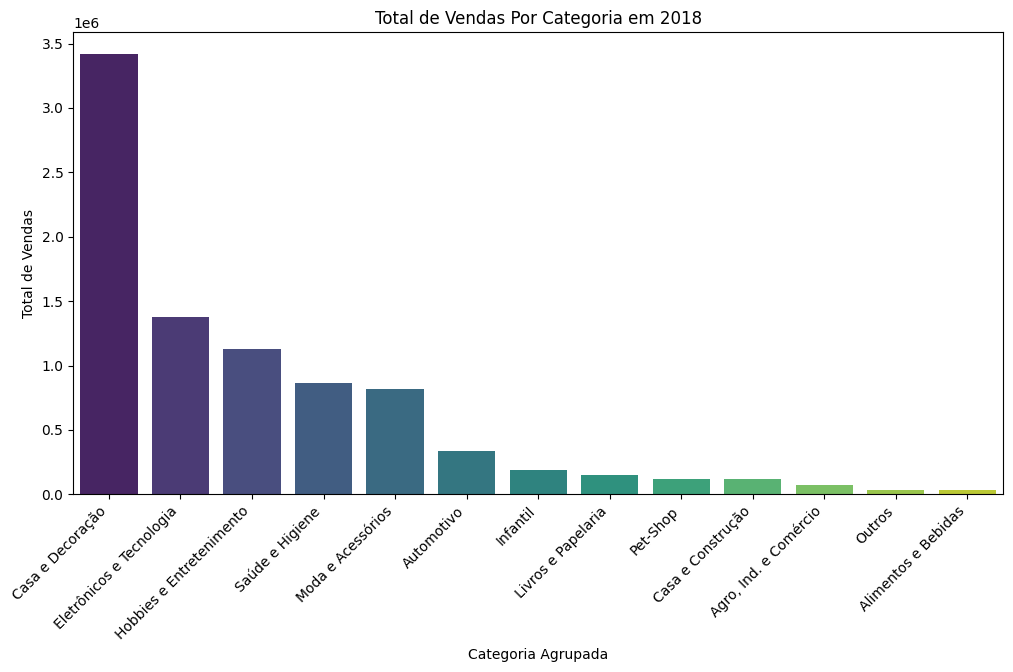

In [177]:
total_pagamentos_ano_2018 = total_pagamentos_por_categoria_no_ano(2017)

total_pagamentos_ano_2018

plt.figure(figsize=(12, 6))

sns.barplot(x=total_pagamentos_ano_2018.index, y=total_pagamentos_ano_2018.values, palette='viridis')
plt.title(f'Total de Vendas Por Categoria em 2018')
plt.xlabel('Categoria Agrupada')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos no eixo x para melhor legibilidade
plt.show()


In [178]:
def total_pagamentos_por_ano_no_estado(sigla_estado: str):
    """
    Calcula o total de pagamentos por ano para um estado específico.

    Parâmetros:
    - sigla_estado: Sigla do estado para o qual calcular o total de pagamentos.

    Retorna:
    - Série contendo o total de pagamentos por ano.
    """
    merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

    return merged_data.loc[merged_data["customer_state"] == sigla_estado].groupby(pd.Grouper(key = 'order_purchase_timestamp', freq='Y'))["payment_value"].sum()



C:\Users\Pichau\AppData\Local\Temp\ipykernel_7496\1302709583.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_pagamentos_por_ano_sao_paulo.index, y=total_pagamentos_por_ano_sao_paulo.values, palette='viridis')


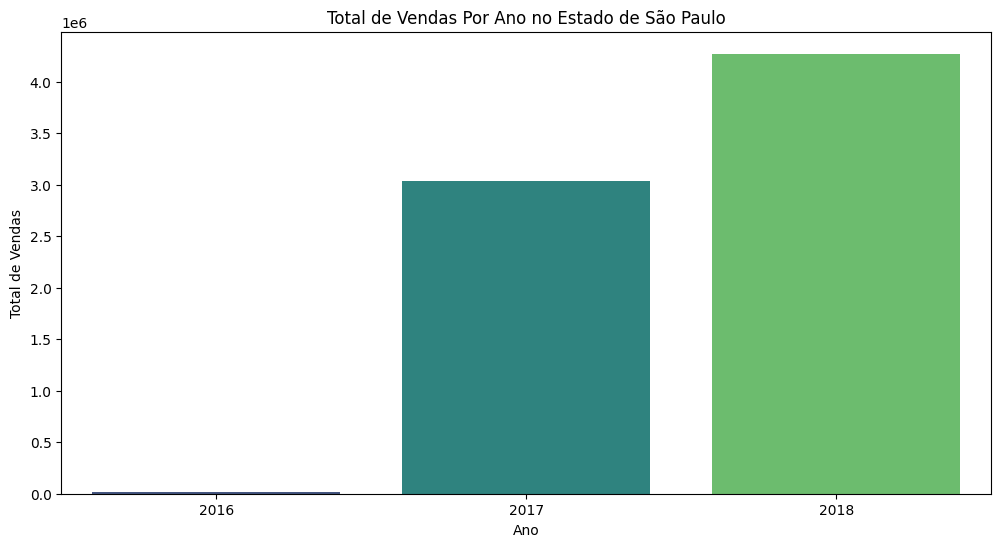

In [179]:
total_pagamentos_por_ano_sao_paulo = total_pagamentos_por_ano_no_estado("SP")

plt.figure(figsize=(12, 6))

sns.barplot(x=total_pagamentos_por_ano_sao_paulo.index, y=total_pagamentos_por_ano_sao_paulo.values, palette='viridis')
plt.title(f'Total de Vendas Por Ano no Estado de São Paulo')
plt.xlabel('Ano')
xticks_originais = plt.gca().get_xticks()
plt.xticks(xticks_originais, ["2016", "2017", "2018"])
plt.ylabel('Total de Vendas')
plt.show()

In [180]:
def total_pagamentos_por_ano_na_cidade(cidade: str):
    """
    Calcula o total de pagamentos por ano para um estado específico.

    Parâmetros:
    - estado: Sigla do estado para o qual calcular o total de pagamentos..

    Retorna:
    - Série contendo o total de pagamentos por ano.
    """
    merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

    return merged_data.loc[merged_data["customer_city"] == cidade].groupby(pd.Grouper(key = 'order_purchase_timestamp', freq='Y'))["payment_value"].sum()


C:\Users\Pichau\AppData\Local\Temp\ipykernel_7496\266241244.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_pagamentos_por_ano_sao_paulo.index, y=total_pagamentos_por_ano_sao_paulo.values, palette='viridis')


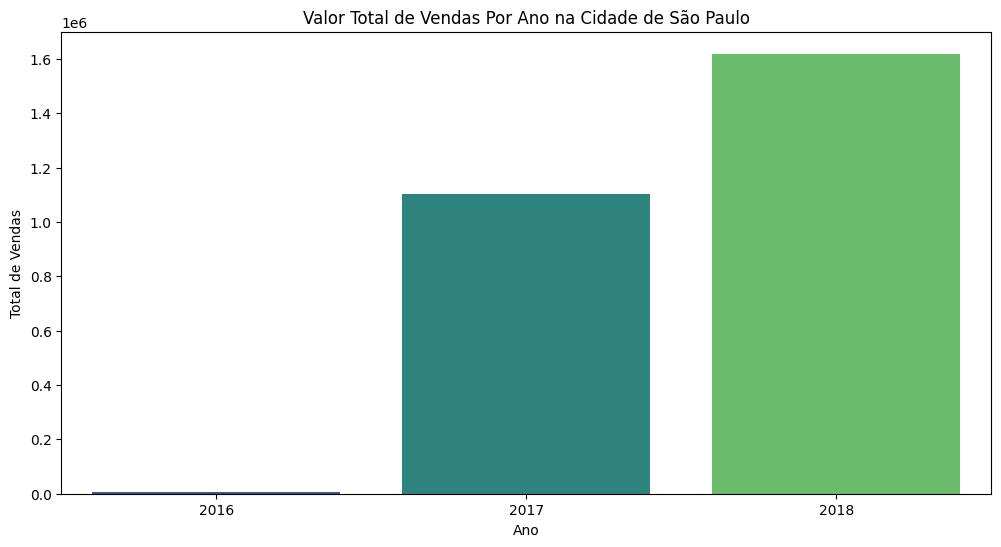

In [200]:
total_pagamentos_por_ano_sao_paulo = total_pagamentos_por_ano_na_cidade("sao paulo")

plt.figure(figsize=(12, 6))

sns.barplot(x=total_pagamentos_por_ano_sao_paulo.index, y=total_pagamentos_por_ano_sao_paulo.values, palette='viridis')
plt.title('Valor Total de Vendas Por Ano na Cidade de São Paulo')
plt.xlabel('Ano')
xticks_originais = plt.gca().get_xticks()
plt.xticks(xticks_originais, ["2016", "2017", "2018"])
plt.ylabel('Total de Vendas')  
plt.show()

C:\Users\Pichau\AppData\Local\Temp\ipykernel_7496\811305782.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_vendas_por_estado.index, y=total_vendas_por_estado.values, palette='viridis')


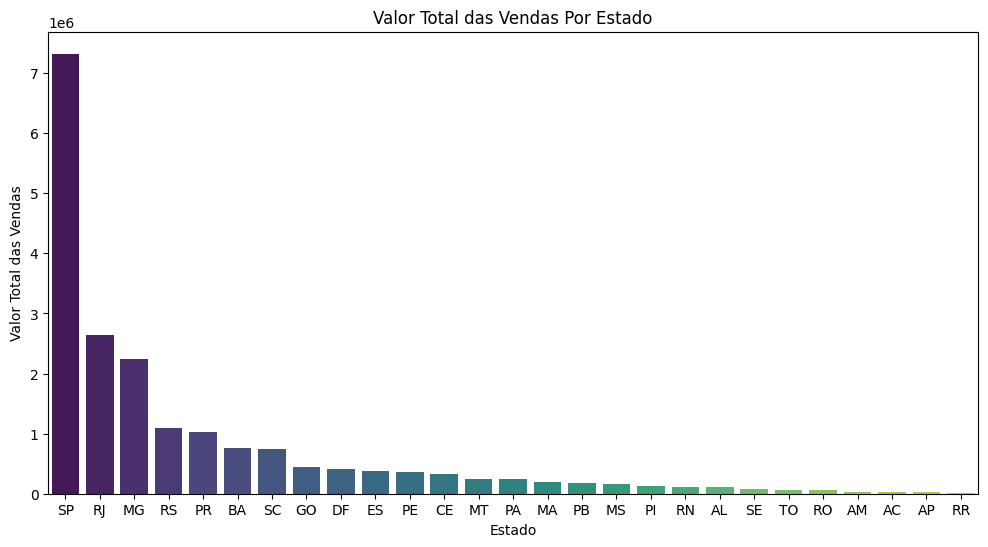

In [199]:
total_vendas_por_estado = merged_data.groupby("customer_state")["payment_value"].sum().sort_values(ascending=False)

total_vendas_por_estado

plt.figure(figsize=(12, 6))

sns.barplot(x=total_vendas_por_estado.index, y=total_vendas_por_estado.values, palette='viridis')
plt.title('Valor Total das Vendas Por Estado')
plt.xlabel('Estado')
plt.ylabel('Valor Total das Vendas')
plt.show()
